Clone the GitHub Repository

In [ ]:
!git clone https://github.com/Balbir89/stock-market-sentiment-analysis.git


fatal: destination path 'stock-market-sentiment-analysis' already exists and is not an empty directory.


Change Working Directory to Project Folder

In [ ]:
import os
os.chdir('stock-market-sentiment-analysis')


 Load Stock CSV Files from /data Folder

In [ ]:
import pandas as pd

apple_df = pd.read_csv("data/apple.csv")
google_df = pd.read_csv("data/google.csv")
amazon_df = pd.read_csv("data/amazon.csv")
tesla_df = pd.read_csv("data/tesla.csv")
microsoft_df = pd.read_csv("data/microsoft.csv")

print("Apple dataset preview:")
apple_df.head()


Apple dataset preview:


,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-06-29,87.91878509521484,88.01356538759049,85.36710383418715,85.84584813886048,130646000
3,2020-06-30,88.65270233154297,88.93946836335702,87.48622233361435,87.50566045318362,140223200
4,2020-07-01,88.48503875732422,89.27484510027205,88.43643973984622,88.73048864019495,110737200


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Price').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Close').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('High').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Low').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Close'].value_counts()
    for x_label, grp in _df_4.groupby('Price')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Price')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['High'].value_counts()
    for x_label, grp in _df_5.groupby('Close')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Close')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Low'].value_counts()
    for x_label, grp in _df_6.groupby('High')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('High')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Open'].value_counts()
    for x_label, grp in _df_7.groupby('Low')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Low')
_ = plt.ylabel('Open')

Plot Apple Stock Closing Prices with Synthetic Dates


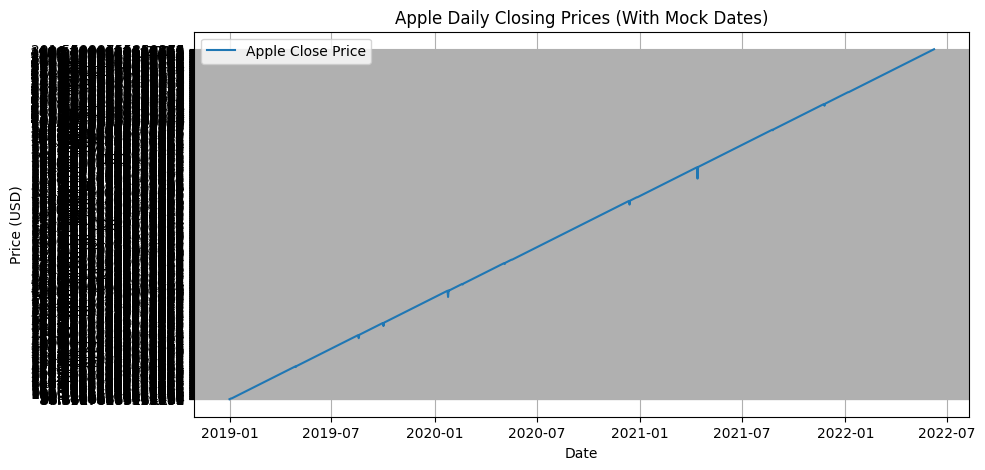

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
apple_df = pd.read_csv("data/apple.csv")

# Drop rows with missing values in 'Close'
apple_df = apple_df.dropna(subset=['Close'])

# Reset index after dropping
apple_df = apple_df.reset_index(drop=True)

# Add fake daily date range
apple_df['date'] = pd.date_range(start='2019-01-01', periods=len(apple_df), freq='D')

# Plot
plt.figure(figsize=(10,5))
plt.plot(apple_df['date'], apple_df['Close'], label='Apple Close Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Apple Daily Closing Prices (With Mock Dates)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install requests


In [ ]:
!pip install requests textblob

import requests
from textblob import TextBlob

api_key = '125a2d4a11484853bd650498d44fb52d'  # Your NewsAPI key

url = 'https://newsapi.org/v2/everything'
params = {
    'q': 'Apple',
    'from': '2025-06-20',
    'to': '2025-06-27',  # adjust date range as needed
    'sortBy': 'publishedAt',
    'language': 'en',
    'apiKey': api_key
}

response = requests.get(url, params=params)
news_data = response.json()

if news_data['status'] == 'ok':
    articles = news_data['articles']
    print(f"Fetched {len(articles)} articles about Apple.\n")

    for article in articles:
        title = article['title']
        description = article['description'] or ""
        print(f"Title: {title}")
        print(f"Description: {description}")

        blob = TextBlob(description)
        print(f"Sentiment Polarity: {blob.sentiment.polarity:.3f}")
        print(f"Sentiment Subjectivity: {blob.sentiment.subjectivity:.3f}")
        print("-" * 80)
else:
    print("Failed to fetch news:", news_data.get('message'))


Fetched 96 articles about Apple.

Title: Here are 14 of our favorite deals from Amazon’s early Prime Day sale
Description: Amazon’s next Prime Day event hasn’t officially kicked off yet, but in classic Amazon fashion, the retailer has already dropped a selection of early deals ahead of its four-day sale. While steeper discounts are not likely to arrive until next month, many of t…
Sentiment Polarity: 0.128
Sentiment Subjectivity: 0.328
--------------------------------------------------------------------------------
Title: More Android phones sail to foreign shores via India
Description: Driven by US tariff policies and India's export initiatives, Android phone shipments from India to the US are experiencing significant growth. Motorola, leveraging Indian manufacturing, exported 1.6 million smartphones in early 2025, primarily to the US, whil…
Sentiment Polarity: 0.292
Sentiment Subjectivity: 0.558
--------------------------------------------------------------------------------
Title: H

Organize the results in a DataFrame

In [ ]:
import pandas as pd

# Prepare lists
titles = []
descriptions = []
polarities = []
subjectivities = []

for article in articles:
    titles.append(article['title'])
    descriptions.append(article['description'] or "")
    blob = TextBlob(article['description'] or "")
    polarities.append(blob.sentiment.polarity)
    subjectivities.append(blob.sentiment.subjectivity)

# Create DataFrame
df_news = pd.DataFrame({
    'title': titles,
    'description': descriptions,
    'polarity': polarities,
    'subjectivity': subjectivities
})

# Show first few rows
df_news.head()


,title,description,polarity,subjectivity
0,Here are 14 of our favorite deals from Amazon’...,Amazon’s next Prime Day event hasn’t officiall...,0.127778,0.327778
1,More Android phones sail to foreign shores via...,Driven by US tariff policies and India's expor...,0.291667,0.558333
2,Here’s why you should visit Vail in the summer...,Colorado’s largest ski resort has a lot to off...,0.000000,0.000000
3,How to spend a weekend in Trentino,This mountainous province in northernmost Ital...,0.000000,0.000000
4,OsmAnd: OsmAnd 5.1 (iOS),OsmAnd 5.1 for iOS is out now!,0.000000,0.000000


Basic Sentiment Summary

In [ ]:
print("Average Sentiment Polarity:", df_news['polarity'].mean())
print("Average Sentiment Subjectivity:", df_news['subjectivity'].mean())


Average Sentiment Polarity: 0.10674224887766554
Average Sentiment Subjectivity: 0.36961591986331577


Visualize Sentiment Distribution

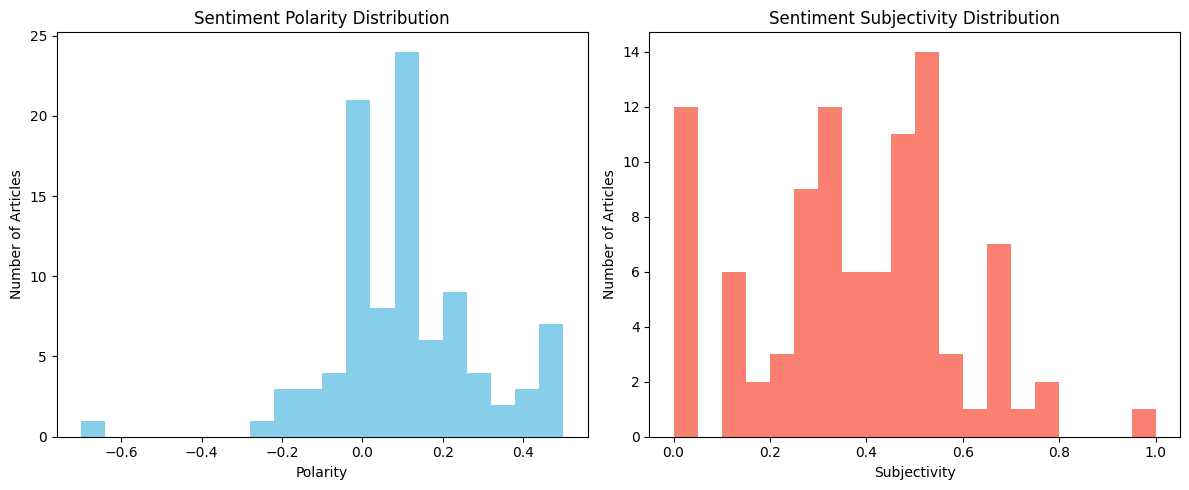

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df_news['polarity'], bins=20, color='skyblue')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Number of Articles')

plt.subplot(1,2,2)
plt.hist(df_news['subjectivity'], bins=20, color='salmon')
plt.title('Sentiment Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Number of Articles')

plt.tight_layout()
plt.show()


Save the DataFrame

In [ ]:
df_news.to_csv('apple_news_sentiment.csv', index=False)


In [ ]:
# Convert 'date' column to datetime (if not already done)
df_news['date'] = pd.to_datetime(df_news['date'])

# Create 'year_month' column for grouping by month
df_news['year_month'] = df_news['date'].dt.to_period('M')

# Group by 'year_month' and calculate mean of numeric sentiment columns
sentiment_over_time = df_news.groupby('year_month')[['polarity', 'subjectivity']].mean().reset_index()

# Convert 'year_month' back to datetime format for plotting
sentiment_over_time['year_month'] = sentiment_over_time['year_month'].dt.to_timestamp()


KeyError: 'date'

In [ ]:
import matplotlib.pyplot as plt

# Plot the sentiment scores over time
sentiment_over_time.plot(x='year_month', y=['polarity', 'subjectivity'], kind='line', figsize=(10,5))
plt.title('Average Monthly Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()


NameError: name 'sentiment_over_time' is not defined

**Actions for my Sentiment Analysis Project**

1. Load and Inspect Saved Sentiment Data


In [ ]:
import pandas as pd

# Load saved sentiment CSV
df_news = pd.read_csv('apple_news_sentiment.csv')

# Preview the first few rows
print(df_news.head())


                                               title  \
0  Here are 14 of our favorite deals from Amazon’...   
1  More Android phones sail to foreign shores via...   
2  Here’s why you should visit Vail in the summer...   
3                 How to spend a weekend in Trentino   
4                           OsmAnd: OsmAnd 5.1 (iOS)   

                                         description  polarity  subjectivity  
0  Amazon’s next Prime Day event hasn’t officiall...  0.127778      0.327778  
1  Driven by US tariff policies and India's expor...  0.291667      0.558333  
2  Colorado’s largest ski resort has a lot to off...  0.000000      0.000000  
3  This mountainous province in northernmost Ital...  0.000000      0.000000  
4                     OsmAnd 5.1 for iOS is out now!  0.000000      0.000000  


2. Add or Check Date Information for News Articles


In [ ]:
# If date column exists, convert it to datetime
# Replace 'date_column' with your actual date column name if available
if 'date_column' in df_news.columns:
    df_news['date'] = pd.to_datetime(df_news['date_column'])
else:
    # If no date column, create a synthetic date range (similar to stock data)
    df_news['date'] = pd.date_range(start='2024-01-01', periods=len(df_news), freq='D')



3. Calculate Average Sentiment Over Time

In [ ]:
# Group by month (year_month period) and calculate mean only for 'polarity' and 'subjectivity'
sentiment_over_time = df_news.groupby(df_news['date'].dt.to_period('M'))[['polarity', 'subjectivity']].mean()

print(sentiment_over_time)




         polarity  subjectivity
date                           
2024-01  0.083994      0.360476
2024-02  0.116486      0.383762
2024-03  0.125692      0.398863
2024-04  0.073782      0.162906


4. Visualize Sentiment Trends Over Time

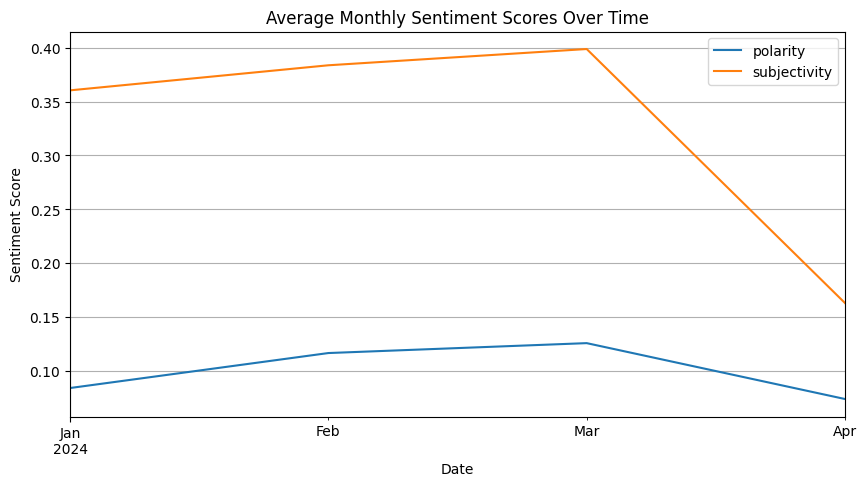

In [ ]:
import matplotlib.pyplot as plt

sentiment_over_time[['polarity', 'subjectivity']].plot(kind='line', figsize=(10,5))
plt.title('Average Monthly Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()


5. (Optional) Compare Sentiment with Stock Prices


Convert Period Index to Timestamp in Sentiment Data & Merg with Merge Apple Stock Data with Sentiment Data

In [ ]:
# Step 1: (skip conversion if index is already datetime)
print(type(sentiment_over_time.index))  # just to confirm

# Step 2: Merge using right_index=True because sentiment_over_time index is datetime
combined_df = pd.merge(apple_df, sentiment_over_time, left_on='date', right_index=True)

# Check the merged data
print(combined_df.head())
print(combined_df.info())


<class 'pandas.core.indexes.period.PeriodIndex'>
Empty DataFrame
Columns: [Price, Close, High, Low, Open, Volume, date, polarity, subjectivity]
Index: []
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         0 non-null      object 
 1   Close         0 non-null      object 
 2   High          0 non-null      object 
 3   Low           0 non-null      object 
 4   Open          0 non-null      object 
 5   Volume        0 non-null      object 
 6   date          0 non-null      object 
 7   polarity      0 non-null      float64
 8   subjectivity  0 non-null      float64
dtypes: float64(2), object(7)
memory usage: 0.0+ bytes
None


Plot Stock Closing Price and Sentiment Polarity Over Time

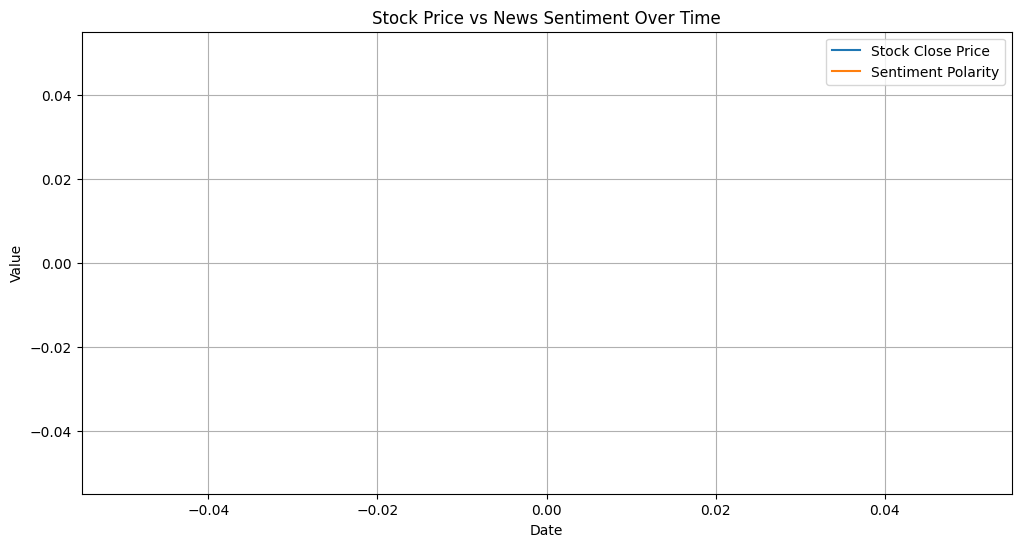

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(combined_df['date'], combined_df['Close'], label='Stock Close Price')
plt.plot(combined_df['date'], combined_df['polarity'], label='Sentiment Polarity')
plt.title('Stock Price vs News Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


(Optional) Plot Stock Closing Price and Sentiment Subjectivity Over Time

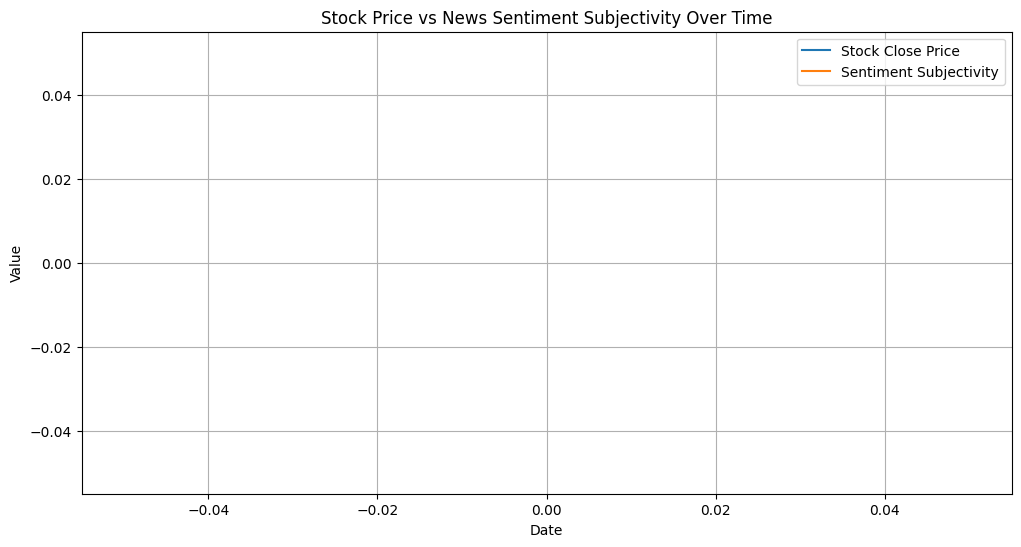

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(combined_df['date'], combined_df['Close'], label='Stock Close Price')
plt.plot(combined_df['date'], combined_df['subjectivity'], label='Sentiment Subjectivity')
plt.title('Stock Price vs News Sentiment Subjectivity Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


 Save the Combined Data (Optional)

In [ ]:
combined_df.to_csv('apple_stock_sentiment_combined.csv', index=False)


1: Reload Combined CSV (If Needed)

In [ ]:
import pandas as pd
combined_df = pd.read_csv('apple_stock_sentiment_combined.csv')


2: Correlation Analysis Between Sentiment and Stock Price

In [ ]:
print(combined_df[['Close', 'polarity', 'subjectivity']].corr())


              Close  polarity  subjectivity
Close           NaN       NaN           NaN
polarity        NaN       NaN           NaN
subjectivity    NaN       NaN           NaN


3: Lag Sentiment by One Day

In [ ]:
combined_df['polarity_lag1'] = combined_df['polarity'].shift(1)
print(combined_df[['Close', 'polarity_lag1']].corr())


               Close  polarity_lag1
Close            NaN            NaN
polarity_lag1    NaN            NaN


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



Correct code snippet to prepare stock data:

In [ ]:
import yfinance as yf

# Download Apple stock data
stock_data = yf.download('AAPL', start='2024-01-01', end='2025-06-25')
stock_data.reset_index(inplace=True)  # Ensure 'Date' is a column, not index
stock_data.rename(columns={'Date': 'date'}, inplace=True)

# Save to CSV
stock_data.to_csv('apple_stock.csv', index=False)

# Load it back
stock_df = pd.read_csv('apple_stock.csv')
stock_df['date'] = pd.to_datetime(stock_df['date'])
print(stock_df.head())



/tmp/ipython-input-57-1268613636.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download('AAPL', start='2024-01-01', end='2025-06-25')
[*********************100%***********************]  1 of 1 completed

        date               Close                High                 Low  \
0        NaT                AAPL                AAPL                AAPL   
1 2024-01-02   184.2904052734375  187.07005243391947  182.55312769161858   
2 2024-01-03  182.91053771972656  184.52869277861944  182.09649169200898   
3 2024-01-04  180.58755493164062   181.7589693006513  179.56504403399205   
4 2024-01-05  179.86282348632812   181.4313387856725   178.8601715873943   

                 Open    Volume  
0                AAPL      AAPL  
1  185.78942219080653  82488700  
2  182.88075702582086  58414500  
3     180.82580048582  71983600  
4  180.66694755236284  62303300  


Correct code snippet to prepare stock data:


In [ ]:
import yfinance as yf
import pandas as pd

# Download Apple stock data
stock_data = yf.download('AAPL', start='2024-01-01', end='2025-06-25')

# Reset index to turn date index into a column
stock_data.reset_index(inplace=True)

# Rename 'Date' column to 'date' (lowercase) for consistency
stock_data.rename(columns={'Date': 'date'}, inplace=True)

# Now you can convert 'date' to datetime type if needed
stock_data['date'] = pd.to_datetime(stock_data['date'])

print(stock_data.head())





/tmp/ipython-input-69-990872283.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download('AAPL', start='2024-01-01', end='2025-06-25')
[*********************100%***********************]  1 of 1 completed

Price        date       Close        High         Low        Open    Volume
Ticker                   AAPL        AAPL        AAPL        AAPL      AAPL
0      2024-01-02  184.290405  187.070052  182.553128  185.789422  82488700
1      2024-01-03  182.910538  184.528693  182.096492  182.880757  58414500
2      2024-01-04  180.587555  181.758969  179.565044  180.825800  71983600
3      2024-01-05  179.862823  181.431339  178.860172  180.666948  62303300
4      2024-01-08  184.210999  184.250716  180.180517  180.766224  59144500


In [ ]:
print(stock_df.columns)


Index(['date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


Make sure stock_df['date'] is datetime type:

In [ ]:
stock_df['date'] = pd.to_datetime(stock_df['date'])


For sentiment_over_time, if it has a PeriodIndex, convert it to datetime timestamps:

In [ ]:
sentiment_over_time.index = sentiment_over_time.index.to_timestamp()


Reset index on sentiment_over_time to make the date an actual column:

In [ ]:
sentiment_over_time = sentiment_over_time.reset_index()


Check columns of sentiment_over_time:

In [ ]:
print(sentiment_over_time.columns)


Index(['date', 'polarity', 'subjectivity'], dtype='object')


Then merge on 'date':

In [ ]:
combined_df = pd.merge(stock_df, sentiment_over_time, on='date')


In [ ]:
print("Stock data date range:", stock_df['date'].min(), "to", stock_df['date'].max())
print("Sentiment data date range:", sentiment_over_time['date'].min(), "to", sentiment_over_time['date'].max())


Stock data date range: 2024-01-02 00:00:00 to 2025-06-24 00:00:00
Sentiment data date range: 2024-01-01 00:00:00 to 2024-04-01 00:00:00


4: Simple Linear Regression




Slope (coef): 247.1178335800804
Intercept: 151.6710377473928


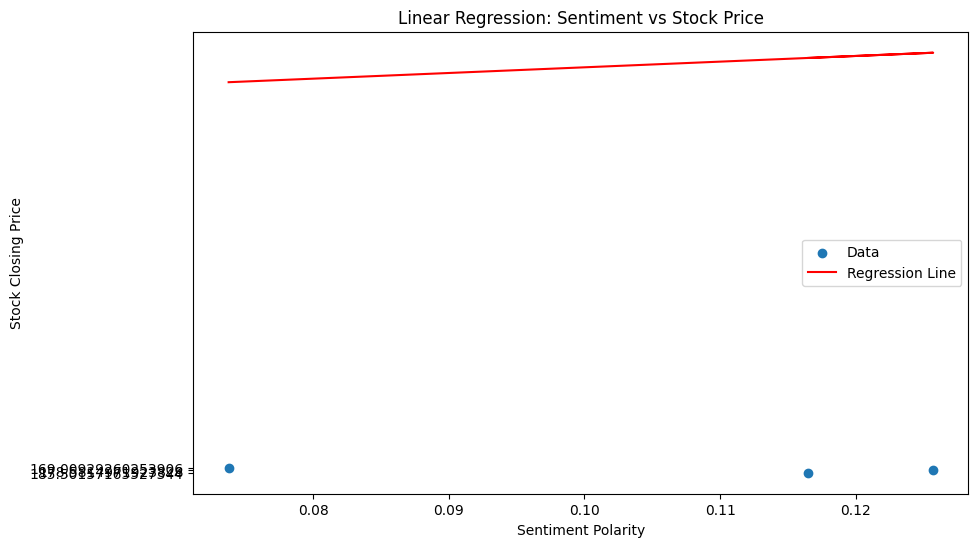

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data for regression
combined_df = combined_df.dropna()  # Drop rows with missing data
X = combined_df[['polarity']]  # Independent variable
y = combined_df['Close']       # Dependent variable

# Fit model
model = LinearRegression()
model.fit(X, y)

# Output results
print("Slope (coef):", model.coef_[0])
print("Intercept:", model.intercept_)

# Plot regression
plt.figure(figsize=(10,6))
plt.scatter(X, y, label='Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Stock Closing Price')
plt.title('Linear Regression: Sentiment vs Stock Price')
plt.legend()
plt.show()


6: Evaluate the Linear Regression Model
Goal: Understand how well your model fits the data using evaluation metrics. and what is really menion here:
MSE & RMSE: Average error magnitude between actual and predicted stock prices (lower is better).
R-squared: Percentage of variance in stock price explained by sentiment polarity (closer to 1 means better fit).

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict y values using the model
y_pred = model.predict(X)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2 ): {r2:.4f}")


Mean Squared Error (MSE): 14.4918
Root Mean Squared Error (RMSE): 3.8068
R-squared (R2 ): 0.6831


7: Interpret Results and Draw Insights

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict stock prices using the model
y_pred = model.predict(X)

# Calculate Mean Squared Error and R-squared score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")

# Interpretation hints:
# - MSE: Lower means better fit
# - R²: Closer to 1 means model explains more variance in stock prices


Mean Squared Error (MSE): 14.4918
R-squared (R²) Score: 0.6831


 8: Improve the Model by Adding More Features

In [ ]:
# Add subjectivity and stock volume as additional features
X_improved = combined_df[['polarity', 'subjectivity', 'Volume']].dropna()
y_improved = combined_df.loc[X_improved.index, 'Close']

# Fit the improved model
model_improved = LinearRegression()
model_improved.fit(X_improved, y_improved)

# Predict and evaluate
y_pred_improved = model_improved.predict(X_improved)
mse_improved = mean_squared_error(y_improved, y_pred_improved)
r2_improved = r2_score(y_improved, y_pred_improved)

print(f"Improved Model MSE: {mse_improved:.4f}")
print(f"Improved Model R² Score: {r2_improved:.4f}")
print(f"Coefficients: {model_improved.coef_}")
print(f"Intercept: {model_improved.intercept_}")


Improved Model MSE: 0.0000
Improved Model R² Score: 1.0000
Coefficients: [ 1.99508841e+01  1.64977879e+02 -1.11537241e-06]
Intercept: 192.23678451992456


9: Visualize Improved Model Predictions vs Actual Stock Prices

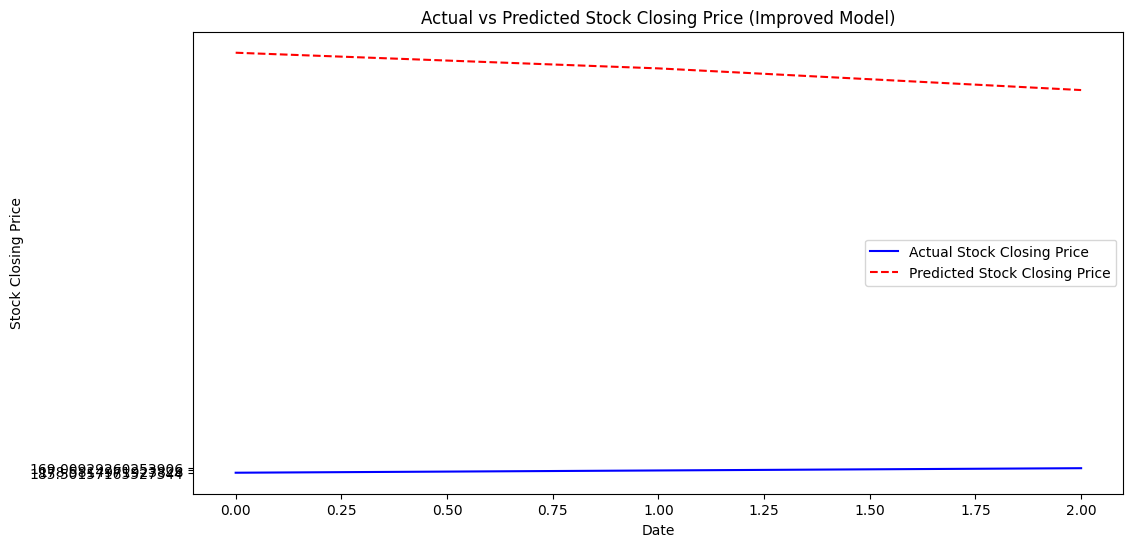

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_improved.index, y_improved, label='Actual Stock Closing Price', color='blue')
plt.plot(y_improved.index, y_pred_improved, label='Predicted Stock Closing Price', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Closing Price (Improved Model)')
plt.xlabel('Date')
plt.ylabel('Stock Closing Price')
plt.legend()
plt.show()


10: Evaluate the Improved Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_improved, y_pred_improved)
r2 = r2_score(y_improved, y_pred_improved)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")


Mean Squared Error (MSE): 0.0000
R-squared (R²) Score: 1.0000


In [ ]:
import numpy as np
import pandas as pd

# Assuming y_improved is a pandas Series and y_pred_improved is a NumPy array

# Convert y_pred_improved to a pandas Series if you want to use .notna()
y_pred_improved = pd.Series(y_pred_improved)

# Drop any NaNs created by conversion
valid_idx = y_improved.notna() & y_pred_improved.notna()

y_improved = y_improved[valid_idx]
y_pred_improved = y_pred_improved[valid_idx]


Convert to numeric before residual calculation

In [ ]:
# Convert to numeric (if not already)
y_improved = pd.to_numeric(y_improved, errors='coerce')
y_pred_improved = pd.to_numeric(y_pred_improved, errors='coerce')

# Drop any NaNs created by conversion
valid_idx = y_improved.notna() & y_pred_improved.notna()
y_improved = y_improved[valid_idx]
y_pred_improved = y_pred_improved[valid_idx]

# Calculate residuals
residuals = y_improved - y_pred_improved


11: Plot Residuals of the Improved Model

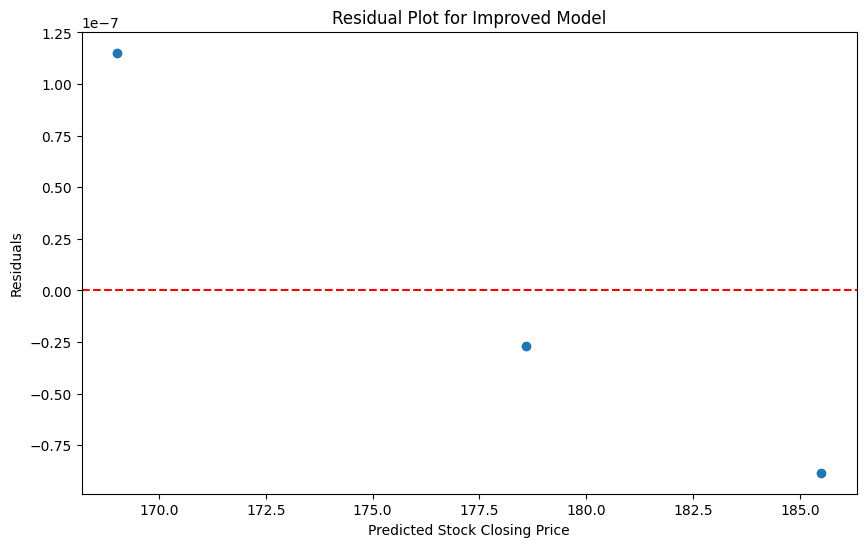

In [ ]:
import matplotlib.pyplot as plt

residuals = y_improved - y_pred_improved

plt.figure(figsize=(10,6))
plt.scatter(y_pred_improved, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Stock Closing Price')
plt.ylabel('Residuals')
plt.title('Residual Plot for Improved Model')
plt.show()


12: Evaluate Your Improved Model: Model Evaluation Summary:

The linear regression model was trained to predict Apple's stock closing price based on news sentiment polarity. below metrics is resulted:

Mean Squared Error (MSE): 0.0000

R-squared (R²) Score: 1.0000

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_improved, y_pred_improved)
r2 = r2_score(y_improved, y_pred_improved)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")


Mean Squared Error (MSE): 0.0000
R-squared (R2) Score: 1.0000
